In [78]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import utils

In [79]:
# Load the data
ListA = pd.read_csv('List A.csv')
ListB = pd.read_csv('List B.csv')
ListC = pd.read_csv('List C.csv')
ListD = pd.read_csv('List D.csv')

In [80]:
# Combine the two lists and add a column to indicate the list
ListA['list'] = 'A'
ListB['list'] = 'B'
ListC['list'] = 'C'
ListD['list'] = 'D'

TotalList = pd.concat([ListA, ListB, ListC])
display(TotalList)

name                     gps  \
0   521 Commercial Street #525  42.3688272,-71.0553792   
1                     Acorn St  42.3576234,-71.0688746   
2    Arlington's Great Meadows  42.4299758,-71.2038948   
3        Arthur Fiedler Statue  42.3565057,-71.0754527   
4                     BU Beach  42.3511927,-71.1060828   
..                         ...                     ...   
28                The Clam Box  42.2763168,-71.0092883   
29               The Partisans  42.3478375,-71.0404428   
30          Union Oyster House    42.361288,-71.056908   
31            Victoria's Diner  42.3270498,-71.0667744   
32             Wollaston Beach  42.2806539,-71.0119933   

                                            googleUrl  \
0   https://maps.google.com/maps?q=+%4042.3688272,...   
1   https://maps.google.com/maps?q=+%4042.3576234,...   
2   https://maps.google.com/maps?q=+%4042.4299758,...   
3   https://maps.google.com/maps?q=+%4042.3565057,...   
4   https://maps.google.com/maps?q=+%4042.3511927,...   
..                                                ...   
28  https://maps.google.com/maps?q=+%4042.2763168,...   
29  https://maps.google.com/maps?q=+%4042.3478375,...   
30  https://maps.google.com/maps?q=+%4042.361288,-...   
31  https://maps.google.com/maps?q=+%4042.3270498,...   
32  https://maps.google.com/maps?q=+%4042.2806539,...   

                                          originalUrl  info  types  \
0   https://www.google.com/maps/place/521+Commerci...   NaN    NaN   
1   https://www.google.com/maps/place/Acorn+St/dat...   NaN    NaN   
2   https://www.google.com/maps/place/Arlington's+...   NaN    NaN   
3   https://www.google.com/maps/place/Arthur+Fiedl...   NaN    NaN   
4   https://www.google.com/maps/place/BU+Beach/dat...   NaN    NaN   
..                                                ...   ...    ...   
28  https://www.google.com/maps/place/The+Clam+Box...   NaN    NaN   
29  https://www.google.com/maps/place/The+Partisan...   NaN    NaN   
30  https://www.google.com/maps/place/Union+Oyster...   NaN    NaN   
31  https://www.google.com/maps/place/Victoria's+D...   NaN    NaN   
32  https://www.google.com/maps/place/Wollaston+Be...   NaN    NaN   

                                              address  \
0                                                 NaN   
1                                                 NaN   
2   Minuteman Commuter Bikeway, Lexington, MA 0242...   
3   Charles River Esplanades, Boston, MA 02114, Un...   
4   270 Bay State Rd, Boston, MA 02215, United States   
..                                                ...   
28  789 Quincy Shore Dr, Quincy, MA 02170, United ...   
29                    Boston, MA 02210, United States   
30       41 Union St, Boston, MA 02108, United States   
31  1024 Massachusetts Ave, Boston, MA 02118, Unit...   
32                          Quincy, MA, United States   

                                          description                type  \
0                                                 NaN                 NaN   
1                                                 NaN                 NaN   
2   183-acres of wet meadows & uplands with trails...     Nature preserve   
3                                                 NaN           Sculpture   
4   A sloping, grassy plaza on the university grou...                Park   
..                                                ...                 ...   
28  Classic beachfront joint with a rustic vibe di...  Seafood restaurant   
29                                                NaN           Sculpture   
30  Historic eatery serving chowder & other New En...  Seafood restaurant   
31  Long-standing classic diner for breakfast & sa...               Diner   
32  Historic 2.3-mi.-long beach with a paved prome...               Beach   

              phone                                            website  \
0               NaN                                                NaN   
1               NaN                          

In [81]:
# Remove all columns but name and gps
TotalList = TotalList[['name', 'gps', 'list']]

In [82]:
# Convert the gps column to a list of lists for k-means
TotalList['gps'] = TotalList['gps'].apply(lambda x: x.strip('[]').split(','))
TotalList['gps'] = TotalList['gps'].apply(lambda x: [float(i) for i in x])

In [83]:
display(TotalList)

name                        gps list
0   521 Commercial Street #525  [42.3688272, -71.0553792]    A
1                     Acorn St  [42.3576234, -71.0688746]    A
2    Arlington's Great Meadows  [42.4299758, -71.2038948]    A
3        Arthur Fiedler Statue  [42.3565057, -71.0754527]    A
4                     BU Beach  [42.3511927, -71.1060828]    A
..                         ...                        ...  ...
28                The Clam Box  [42.2763168, -71.0092883]    C
29               The Partisans  [42.3478375, -71.0404428]    C
30          Union Oyster House    [42.361288, -71.056908]    C
31            Victoria's Diner  [42.3270498, -71.0667744]    C
32             Wollaston Beach  [42.2806539, -71.0119933]    C

[131 rows x 3 columns]

# Dendrogram

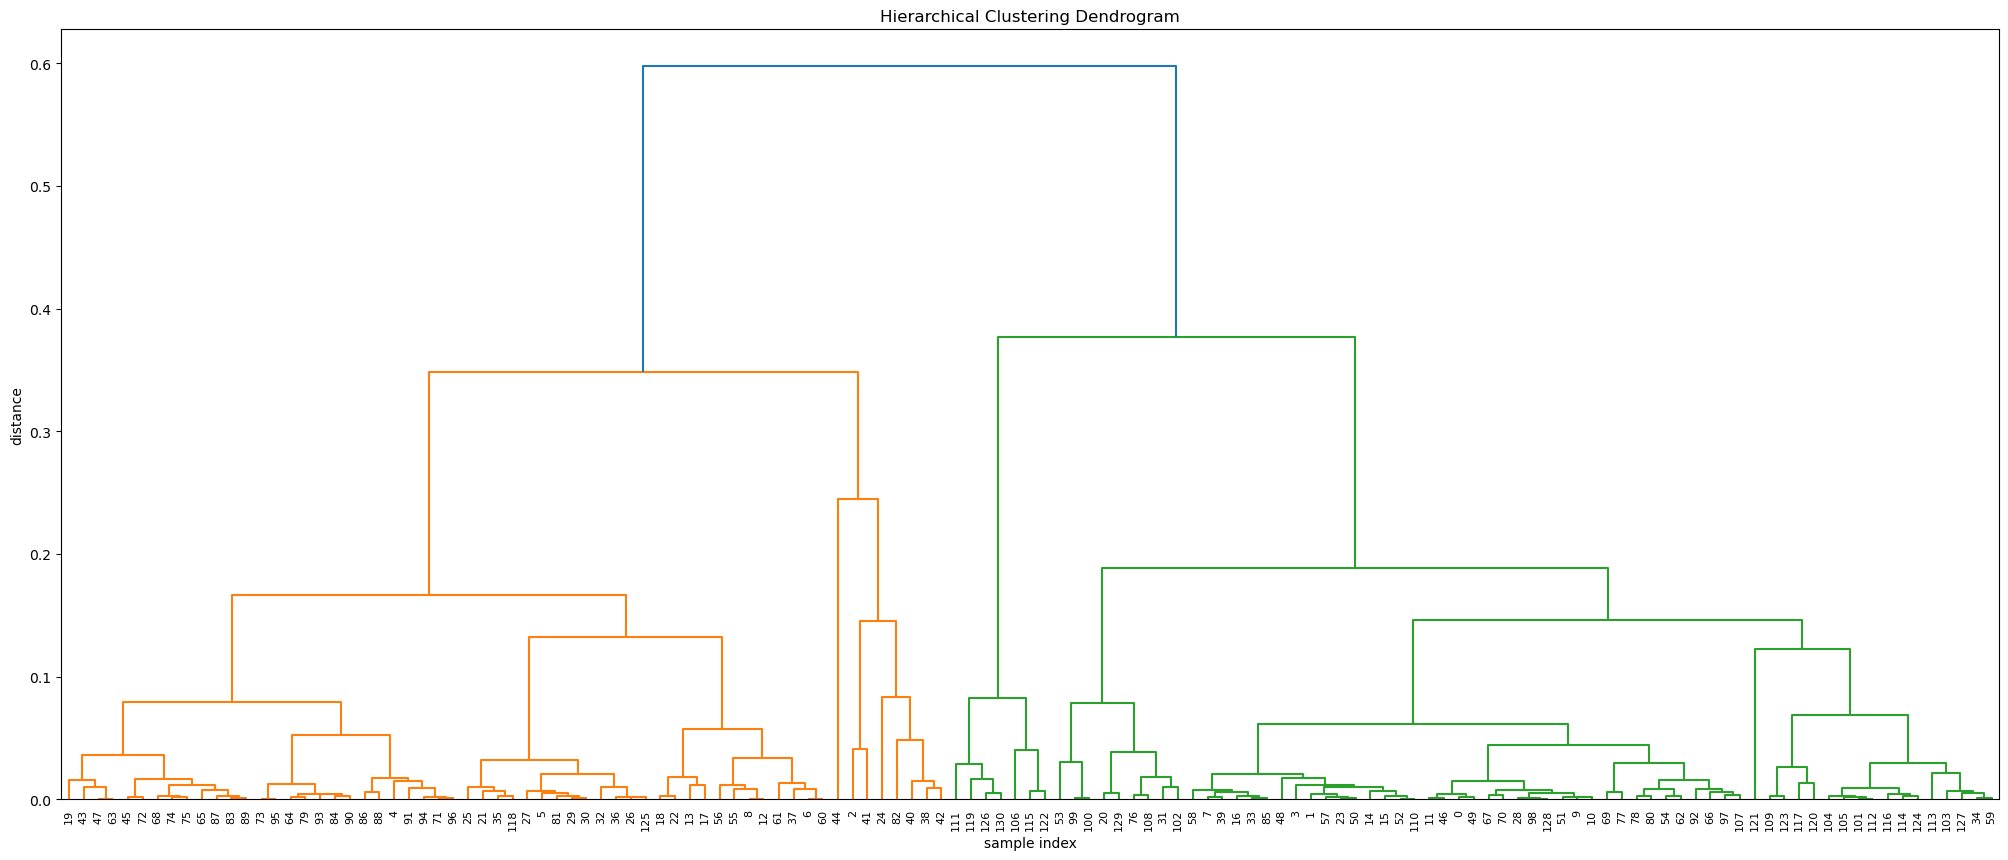

In [84]:
# Create the linkage matrix
linkage_matrix = linkage(TotalList['gps'].values.tolist(), 'ward')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [85]:
# Set the threshold distance
threshold_distance = 0.15

# Cut the dendrogram to get cluster labels
cluster_labels_hc = fcluster(linkage_matrix, t=threshold_distance, criterion='distance')

# Now, you have the number of clusters determined by the dendrogram
num_clusters = len(np.unique(cluster_labels_hc))
print("Number of clusters:", num_clusters)

# Calculate the silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(TotalList['gps'].values.tolist(), cluster_labels_hc)
print("Silhouette score:", silhouette_avg)

Number of clusters: 7
Silhouette score: 0.42876627286716495


# K-means

In [86]:
# Cluster the data using Gaussian Mixture Models
# Create two centroids, one in the North End and one in the Financial District
centroids = [[42.364506, -71.054733], [42.358894, -71.056742]]

In [87]:
# Create a weights column that increases as the location gets closer to the centroids

# Compute the distance from each point to each centroid
TotalList['weights'] = TotalList['gps'].apply(lambda x: [np.linalg.norm(np.array(x) - np.array(centroids[0])), np.linalg.norm(np.array(x) - np.array(centroids[1]))])

# Invert the weights so that the locations closest to the centroids have the highest weights
TotalList['weights'] = TotalList['weights'].apply(lambda x: [1/i for i in x])

# Sum the weights
TotalList['weights'] = TotalList['weights'].apply(lambda x: sum(x))

# Normalize the weights
TotalList['weights'] = TotalList['weights'].apply(lambda x: x/sum(TotalList['weights']))

display(TotalList)

name                        gps list   weights
0   521 Commercial Street #525  [42.3688272, -71.0553792]    A  0.018132
1                     Acorn St  [42.3576234, -71.0688746]    A  0.008032
2    Arlington's Great Meadows  [42.4299758, -71.2038948]    A  0.000676
3        Arthur Fiedler Statue  [42.3565057, -71.0754527]    A  0.005410
4                     BU Beach  [42.3511927, -71.1060828]    A  0.002145
..                         ...                        ...  ...       ...
28                The Clam Box  [42.2763168, -71.0092883]    C  0.001136
29               The Partisans  [42.3478375, -71.0404428]    C  0.005315
30          Union Oyster House    [42.361288, -71.056908]    C  0.037200
31            Victoria's Diner  [42.3270498, -71.0667744]    C  0.003055
32             Wollaston Beach  [42.2806539, -71.0119933]    C  0.001198

[131 rows x 4 columns]

In [88]:
kmeans = KMeans(n_clusters=2, init=centroids).fit(TotalList['gps'].values.tolist())

/Users/garrinshieh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/garrinshieh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [89]:
# Add the cluster labels to the dataframe
TotalList['cluster'] = kmeans.labels_

In [90]:
# Display the dataframe
display(TotalList)

name                        gps list   weights  \
0   521 Commercial Street #525  [42.3688272, -71.0553792]    A  0.018132   
1                     Acorn St  [42.3576234, -71.0688746]    A  0.008032   
2    Arlington's Great Meadows  [42.4299758, -71.2038948]    A  0.000676   
3        Arthur Fiedler Statue  [42.3565057, -71.0754527]    A  0.005410   
4                     BU Beach  [42.3511927, -71.1060828]    A  0.002145   
..                         ...                        ...  ...       ...   
28                The Clam Box  [42.2763168, -71.0092883]    C  0.001136   
29               The Partisans  [42.3478375, -71.0404428]    C  0.005315   
30          Union Oyster House    [42.361288, -71.056908]    C  0.037200   
31            Victoria's Diner  [42.3270498, -71.0667744]    C  0.003055   
32             Wollaston Beach  [42.2806539, -71.0119933]    C  0.001198   

    cluster  
0         1  
1         1  
2         0  
3         1  
4         0  
..      ...  
28        1  
29        1  
30        1  
31        1  
32        1  

[131 rows x 5 columns]

# Map

In [91]:
# Create a map in Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

In [92]:
# Plot the centroids on the map
for i in range(len(centroids)):
    folium.Marker(centroids[i], popup='Centroid ' + str(i), icon=folium.Icon(color='black')).add_to(m)
    
# Add the points to the map with different colors for each cluster
for i, row in TotalList.iterrows():
    if row['cluster'] == 0:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='red')).add_to(m)
    elif row['cluster'] == 1:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='blue')).add_to(m)
    elif row['cluster'] == 2:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='green')).add_to(m)
    elif row['cluster'] == 3:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='purple')).add_to(m)
    elif row['cluster'] == 4:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='orange')).add_to(m)
    elif row['cluster'] == 5:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='darkred')).add_to(m)
    elif row['cluster'] == 6:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='lightred')).add_to(m)
    elif row['cluster'] == 7:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='beige')).add_to(m)
    elif row['cluster'] == 8:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='darkblue')).add_to(m)
    elif row['cluster'] == 9:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='lightblue')).add_to(m)
    elif row['cluster'] == 10:
        folium.Marker([row['gps'][0], row['gps'][1]], popup=row['name'], icon=folium.Icon(color='cadet')).add_to(m)

In [93]:
# Display the map
m

In [94]:
# Display the number of locations in each cluster
TotalList['cluster'].value_counts()

1    74
0    57
Name: cluster, dtype: int64

In [73]:
# create a method to move n number of locations from the largest cluster to the smallest cluster, taking distance into account
def equalize_clusters(df, n):
    # Get the number of locations in each cluster
    cluster_counts = df['cluster'].value_counts()
    
    # Get the largest and smallest clusters
    largest_cluster = cluster_counts.index[0]
    smallest_cluster = cluster_counts.index[-1]
    
    # Get the locations in the largest cluster
    largest_cluster_locations = df[df['cluster'] == largest_cluster]
    
    # Get the locations in the smallest cluster
    smallest_cluster_locations = df[df['cluster'] == smallest_cluster]
    
    # Create a list of distances from each location in the largest cluster to each location in the smallest cluster
    distances = []
    for i, row in largest_cluster_locations.iterrows():
        for j, row2 in smallest_cluster_locations.iterrows():
            distances.append([i, j, np.linalg.norm(np.array(row['gps']) - np.array(row2['gps']))])
    
    # Sort the distances by distance
    distances.sort(key=lambda x: x[2])
    
    # Move the n closest locations from the largest cluster to the smallest cluster
    for i in range(n):
        df.loc[distances[i][0], 'cluster'] = smallest_cluster
        df.loc[distances[i][1], 'cluster'] = largest_cluster
    
    return df

In [74]:
# Equalize the clusters
TotalList = equalize_clusters(TotalList, 20)

# Display the number of locations in each cluster
TotalList['cluster'].value_counts()

0    97
1    72
Name: cluster, dtype: int64

In [75]:
utils.list_to_string(TotalList['gps'].values.tolist())

'-71.0553792,42.3688272;-71.0688746,42.3576234;-71.2038948,42.4299758;-71.0754527,42.3565057;-71.1060828,42.3511927;-71.0969274,42.3446263;-71.130887,42.35304;-71.0620802,42.3579151;-71.1459593,42.3501823;-71.0586014,42.357357;-71.0572023,42.3587627;-71.0556268,42.36521;-71.1460435,42.3495825;-71.1217152,42.3426377;-71.0720926,42.3489004;-71.067859,42.3500079;-71.0632036,42.3556154;-71.1258765,42.331864;-71.1095021,42.3364675;-71.133103,42.3890049;-71.0620134,42.3248471;-71.0851891,42.3500031;-71.1123834,42.3360385;-71.066414,42.354296;-71.2273649,42.3145041;-71.0834061,42.341987;-71.0992038,42.3306454;-71.0990577,42.3381442;-71.0569649,42.3604952;-71.0949218,42.3419564;-71.0942861,42.3413301;-71.0498714,42.3256817;-71.0908104,42.329969;-71.0616035,42.3537983;-71.0359433,42.3485465;-71.0913583,42.3490205;-71.1000217,42.3323776;-71.1241295,42.3518397;-71.1618052,42.3245965;-71.0638101,42.3587772;-71.1625829,42.340795;-71.167854,42.4107892;-71.155555,42.3317473;-71.1227278,42.3965778;-71

In [95]:
# Return the list of locations in each cluster
print(len(TotalList[TotalList['cluster'] == 0]['gps'].values.tolist()))
utils.list_to_string(TotalList[TotalList['cluster'] == 0]['gps'].values.tolist())

57


'-71.2038948,42.4299758;-71.1060828,42.3511927;-71.0969274,42.3446263;-71.130887,42.35304;-71.1459593,42.3501823;-71.1460435,42.3495825;-71.1217152,42.3426377;-71.1258765,42.331864;-71.1095021,42.3364675;-71.133103,42.3890049;-71.1123834,42.3360385;-71.2273649,42.3145041;-71.0992038,42.3306454;-71.0990577,42.3381442;-71.0949218,42.3419564;-71.0942861,42.3413301;-71.0913583,42.3490205;-71.1000217,42.3323776;-71.1241295,42.3518397;-71.1618052,42.3245965;-71.1625829,42.340795;-71.167854,42.4107892;-71.155555,42.3317473;-71.1227278,42.3965778;-71.3598149,42.3140229;-71.1126695,42.3836229;-71.119149,42.3884;-71.1427371,42.3433772;-71.1438455,42.3569102;-71.1313443,42.3525708;-71.1284677,42.3631904;-71.119301,42.388547;-71.097883,42.381008;-71.1107166,42.3741209;-71.1194344,42.3754427;-71.1013044,42.3627462;-71.1108423,42.3838224;-71.1026937,42.3820702;-71.1189467,42.373465;-71.1208817,42.3732344;-71.0968274,42.3799095;-71.094048,42.339381;-71.1854722,42.3621177;-71.1146697,42.3782386;-71.09

In [96]:
print(len(TotalList[TotalList['cluster'] == 1]['gps'].values.tolist()))
utils.list_to_string(TotalList[TotalList['cluster'] == 1]['gps'].values.tolist())

74


'-71.0553792,42.3688272;-71.0688746,42.3576234;-71.0754527,42.3565057;-71.0620802,42.3579151;-71.0586014,42.357357;-71.0572023,42.3587627;-71.0556268,42.36521;-71.0720926,42.3489004;-71.067859,42.3500079;-71.0632036,42.3556154;-71.0620134,42.3248471;-71.0851891,42.3500031;-71.066414,42.354296;-71.0834061,42.341987;-71.0569649,42.3604952;-71.0498714,42.3256817;-71.0908104,42.329969;-71.0616035,42.3537983;-71.0359433,42.3485465;-71.0638101,42.3587772;-71.0555003,42.3640137;-71.0712561,42.3407613;-71.0561781,42.3668968;-71.0664019,42.3554589;-71.059228,42.359349;-71.0668408,42.3524116;-71.0872846,42.2961434;-71.062146,42.366198;-71.0651214,42.3553972;-71.0596124,42.3509517;-71.0359354,42.3478381;-71.061757,42.3691906;-71.0609962,42.3803747;-71.0516339,42.3609921;-71.0809932,42.3675275;-71.0545357,42.3597994;-71.0342146,42.316274;-71.0756902,42.3695046;-71.0678704,42.3701829;-71.0656594,42.3718401;-71.0611749,42.3551807;-71.0554239,42.3739796;-71.0631664,42.3741694;-71.056823,42.361531;-71